In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Prepare Data
df = pd.read_csv('/content/Amazon Sales data.csv')  # Assuming your data is in a CSV file

# Handle missing values (if any)
df.dropna(inplace=True)

# Convert to correct data types
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Units Sold'] = pd.to_numeric(df['Units Sold'])
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'])

# Calculate key metrics
df['Total Revenue'] = df['Units Sold'] * df['Unit Price']
df['Total Cost'] = df['Units Sold'] * df['Unit Cost']
df['Total Profit'] = df['Total Revenue'] - df['Total Cost']

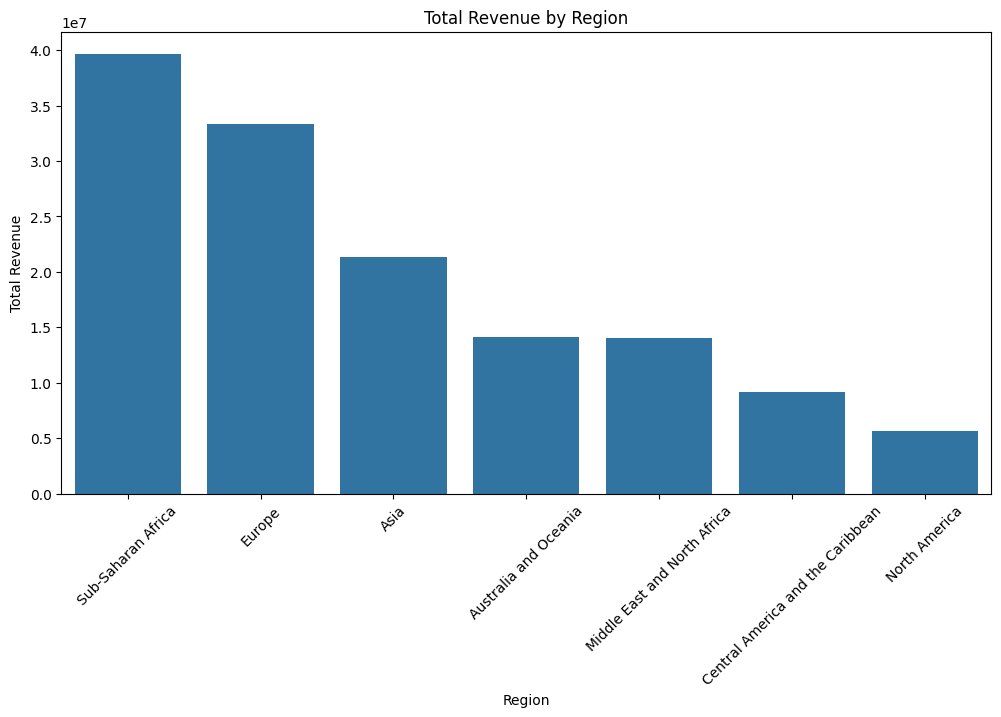

In [ ]:
# 2. Regional Analysis
sales_by_region = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

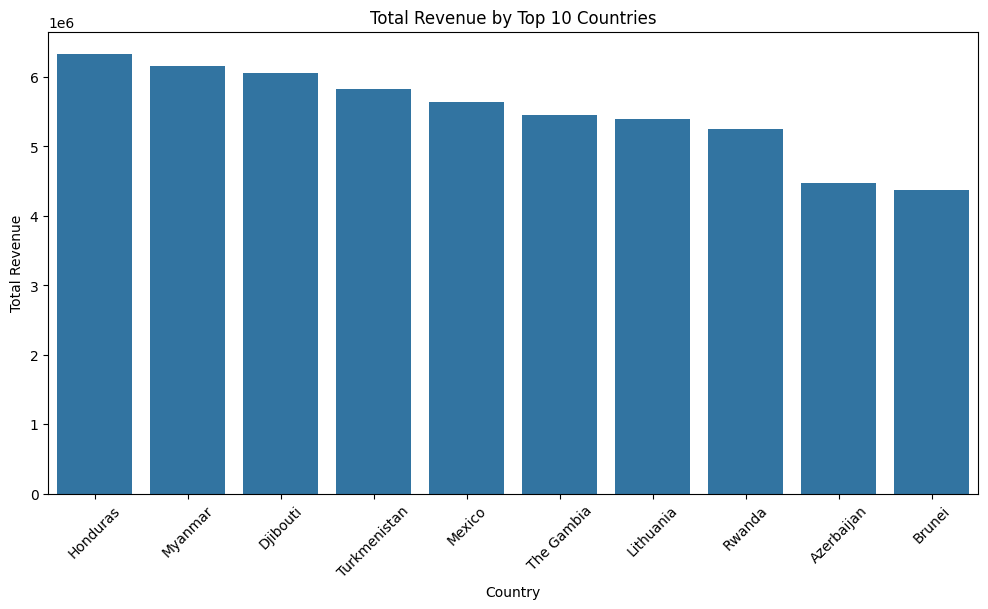

In [ ]:
# If you have country-level sales data, you can also visualize it
sales_by_country = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)
top_10_countries = sales_by_country.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Total Revenue by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

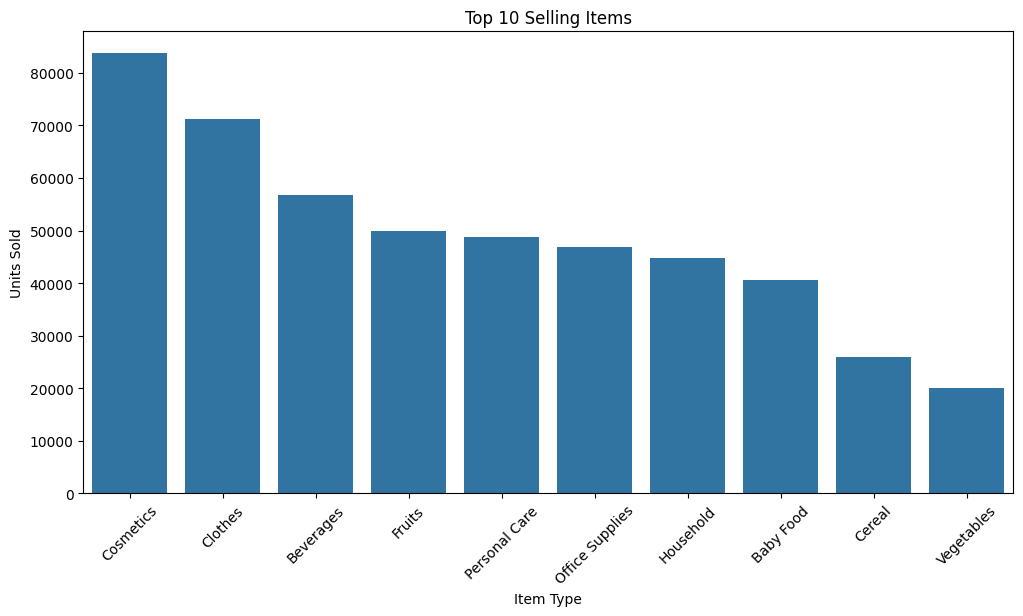

In [ ]:
# 3. Product Analysis (Top 10 Selling Items)
top_items = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top 10 Selling Items')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

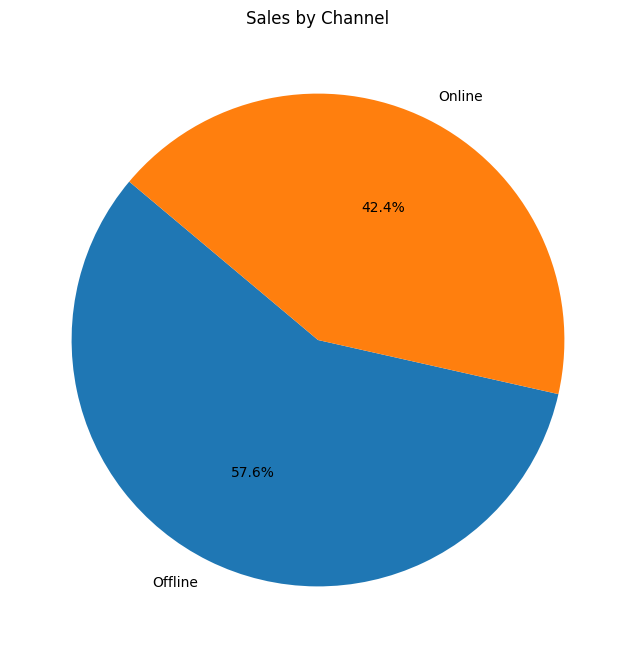

In [ ]:
# 4. Sales Channel Analysis
sales_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_channel, labels=sales_by_channel.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Channel')
plt.show()